## 使用torch中的卷积来做模板匹配

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import PIL.Image as Image
import numpy as np
import torchvision.transforms as transforms

c:\Users\dongl\.conda\envs\d2l\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


## 加载图片

In [2]:
mario = Image.open("images/mario.png")
mario_gray = mario.convert("L")

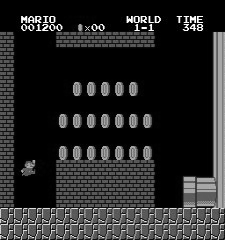

In [3]:
mario_gray

In [4]:
template = Image.open("images/template16x16.png")
template_gray = template.convert("L")

In [5]:
template_gray

## 开始卷积

In [6]:
transform = transforms.Compose([
    transforms.ToTensor()
])
mario_tensor = transform(mario_gray)
template_tensor = transform(template_gray)
mario_tensor.shape, template_tensor.shape

(torch.Size([1, 240, 225]), torch.Size([1, 16, 16]))

In [7]:
mario_tensor = mario_tensor.unsqueeze(0)
template_tensor = template_tensor.unsqueeze(0)
mario_tensor.shape, template_tensor.shape

(torch.Size([1, 1, 240, 225]), torch.Size([1, 1, 16, 16]))

In [8]:
R_CCORR  = F.conv2d(mario_tensor, template_tensor)
R_CCORR.shape

torch.Size([1, 1, 225, 210])

In [9]:
R_CCORR = R_CCORR.numpy().squeeze()
mario_gray_np = mario_tensor.numpy().squeeze()

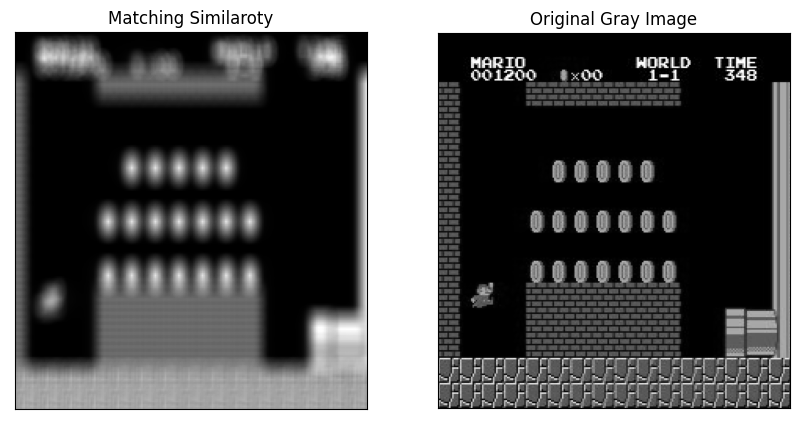

In [10]:
import matplotlib.pyplot as plt
plt.figure("Matching Similaroty vs Original Gray Image", figsize=(10, 5))
plt.subplot(121),plt.imshow(R_CCORR,cmap = 'gray')
plt.title('Matching Similaroty'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mario_gray_np,cmap = 'gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
R_CCORR.max(), R_CCORR.min()

(35.06243, 0.0)

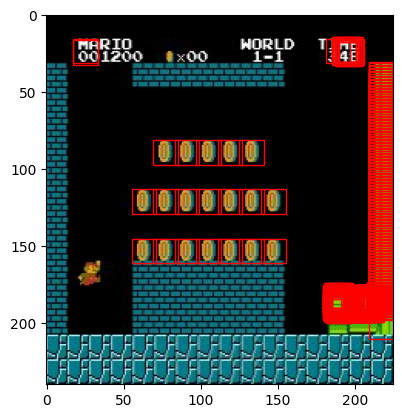

In [14]:
import matplotlib.patches as patches
plt.imshow(mario)
threshold = 30
loc = np.where( R_CCORR > threshold)
_, _ , h, w = template_tensor.shape
for pt in zip(*loc[::-1]):
    # print(pt)
    rect = patches.Rectangle(pt, w, h, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

## 总结

可以看到还是把所有的相似度高的地方都找了出来，但由于没有做归一化，所以导致有的地方只是数值高也被计算了进来，下一步需要考虑如何做好归一化。